# Разведочный анализ данных датасетов композитных материалов

### Загрузим оба датасета в ноутбук и сджойним их по колонке индексов, предварительно импортировав необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r'.\datasets\X_bp.csv',index_col=0)
df2 = pd.read_csv(r'.\datasets\X_nup.csv',index_col=0)

Используем тип соединения inner, чтобы у нас в результирующем датафрейме сразу отфильтровались строки с пропусками (т.е. строка не попадет в результирующую выборку, если для неё нет соотвествия по индексу в обоих датафреймах):

In [3]:
df = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

Итоговый датасет не содержит пропущенных значений ни в одной колонке, перевод в другие форматы данных или кодирование не требуется.

### Статистика получившегося датасета, выбросы, корреляции:

In [4]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","Модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


Прверим датасет на отсутствие записей дубликатов

In [5]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
Модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Text(0.5, 1.0, 'Пропуски')

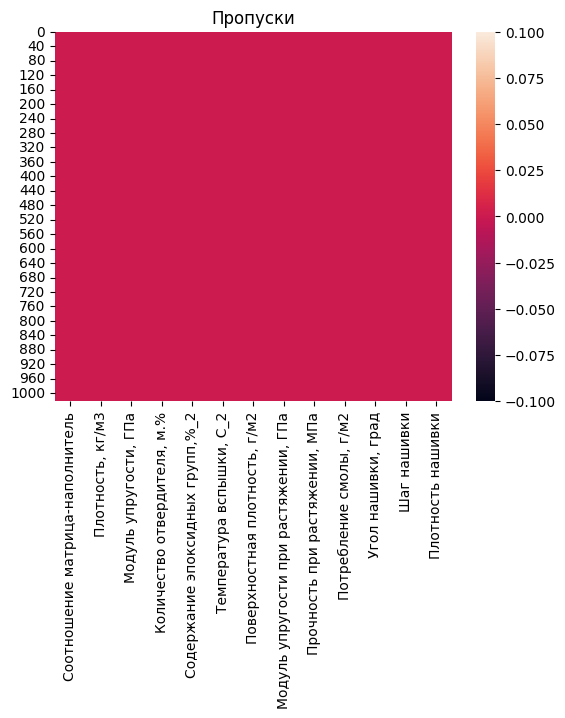

In [6]:
col=df.columns
sns.heatmap(df[col].isnull())
plt.title('Пропуски')

In [7]:
# Полные бубликаты строк
df.duplicated().sum()

0

Дубликаты записей отсутствуют. Так же обратим внимание, что признак "Угол нашивки" имеет низкую дисперсию - всего два значения, однако поскольку это числовой признак, то переводить его к категориальным данным не имеет смысла.

c:\Users\Mike\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mike\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mike\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mike\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

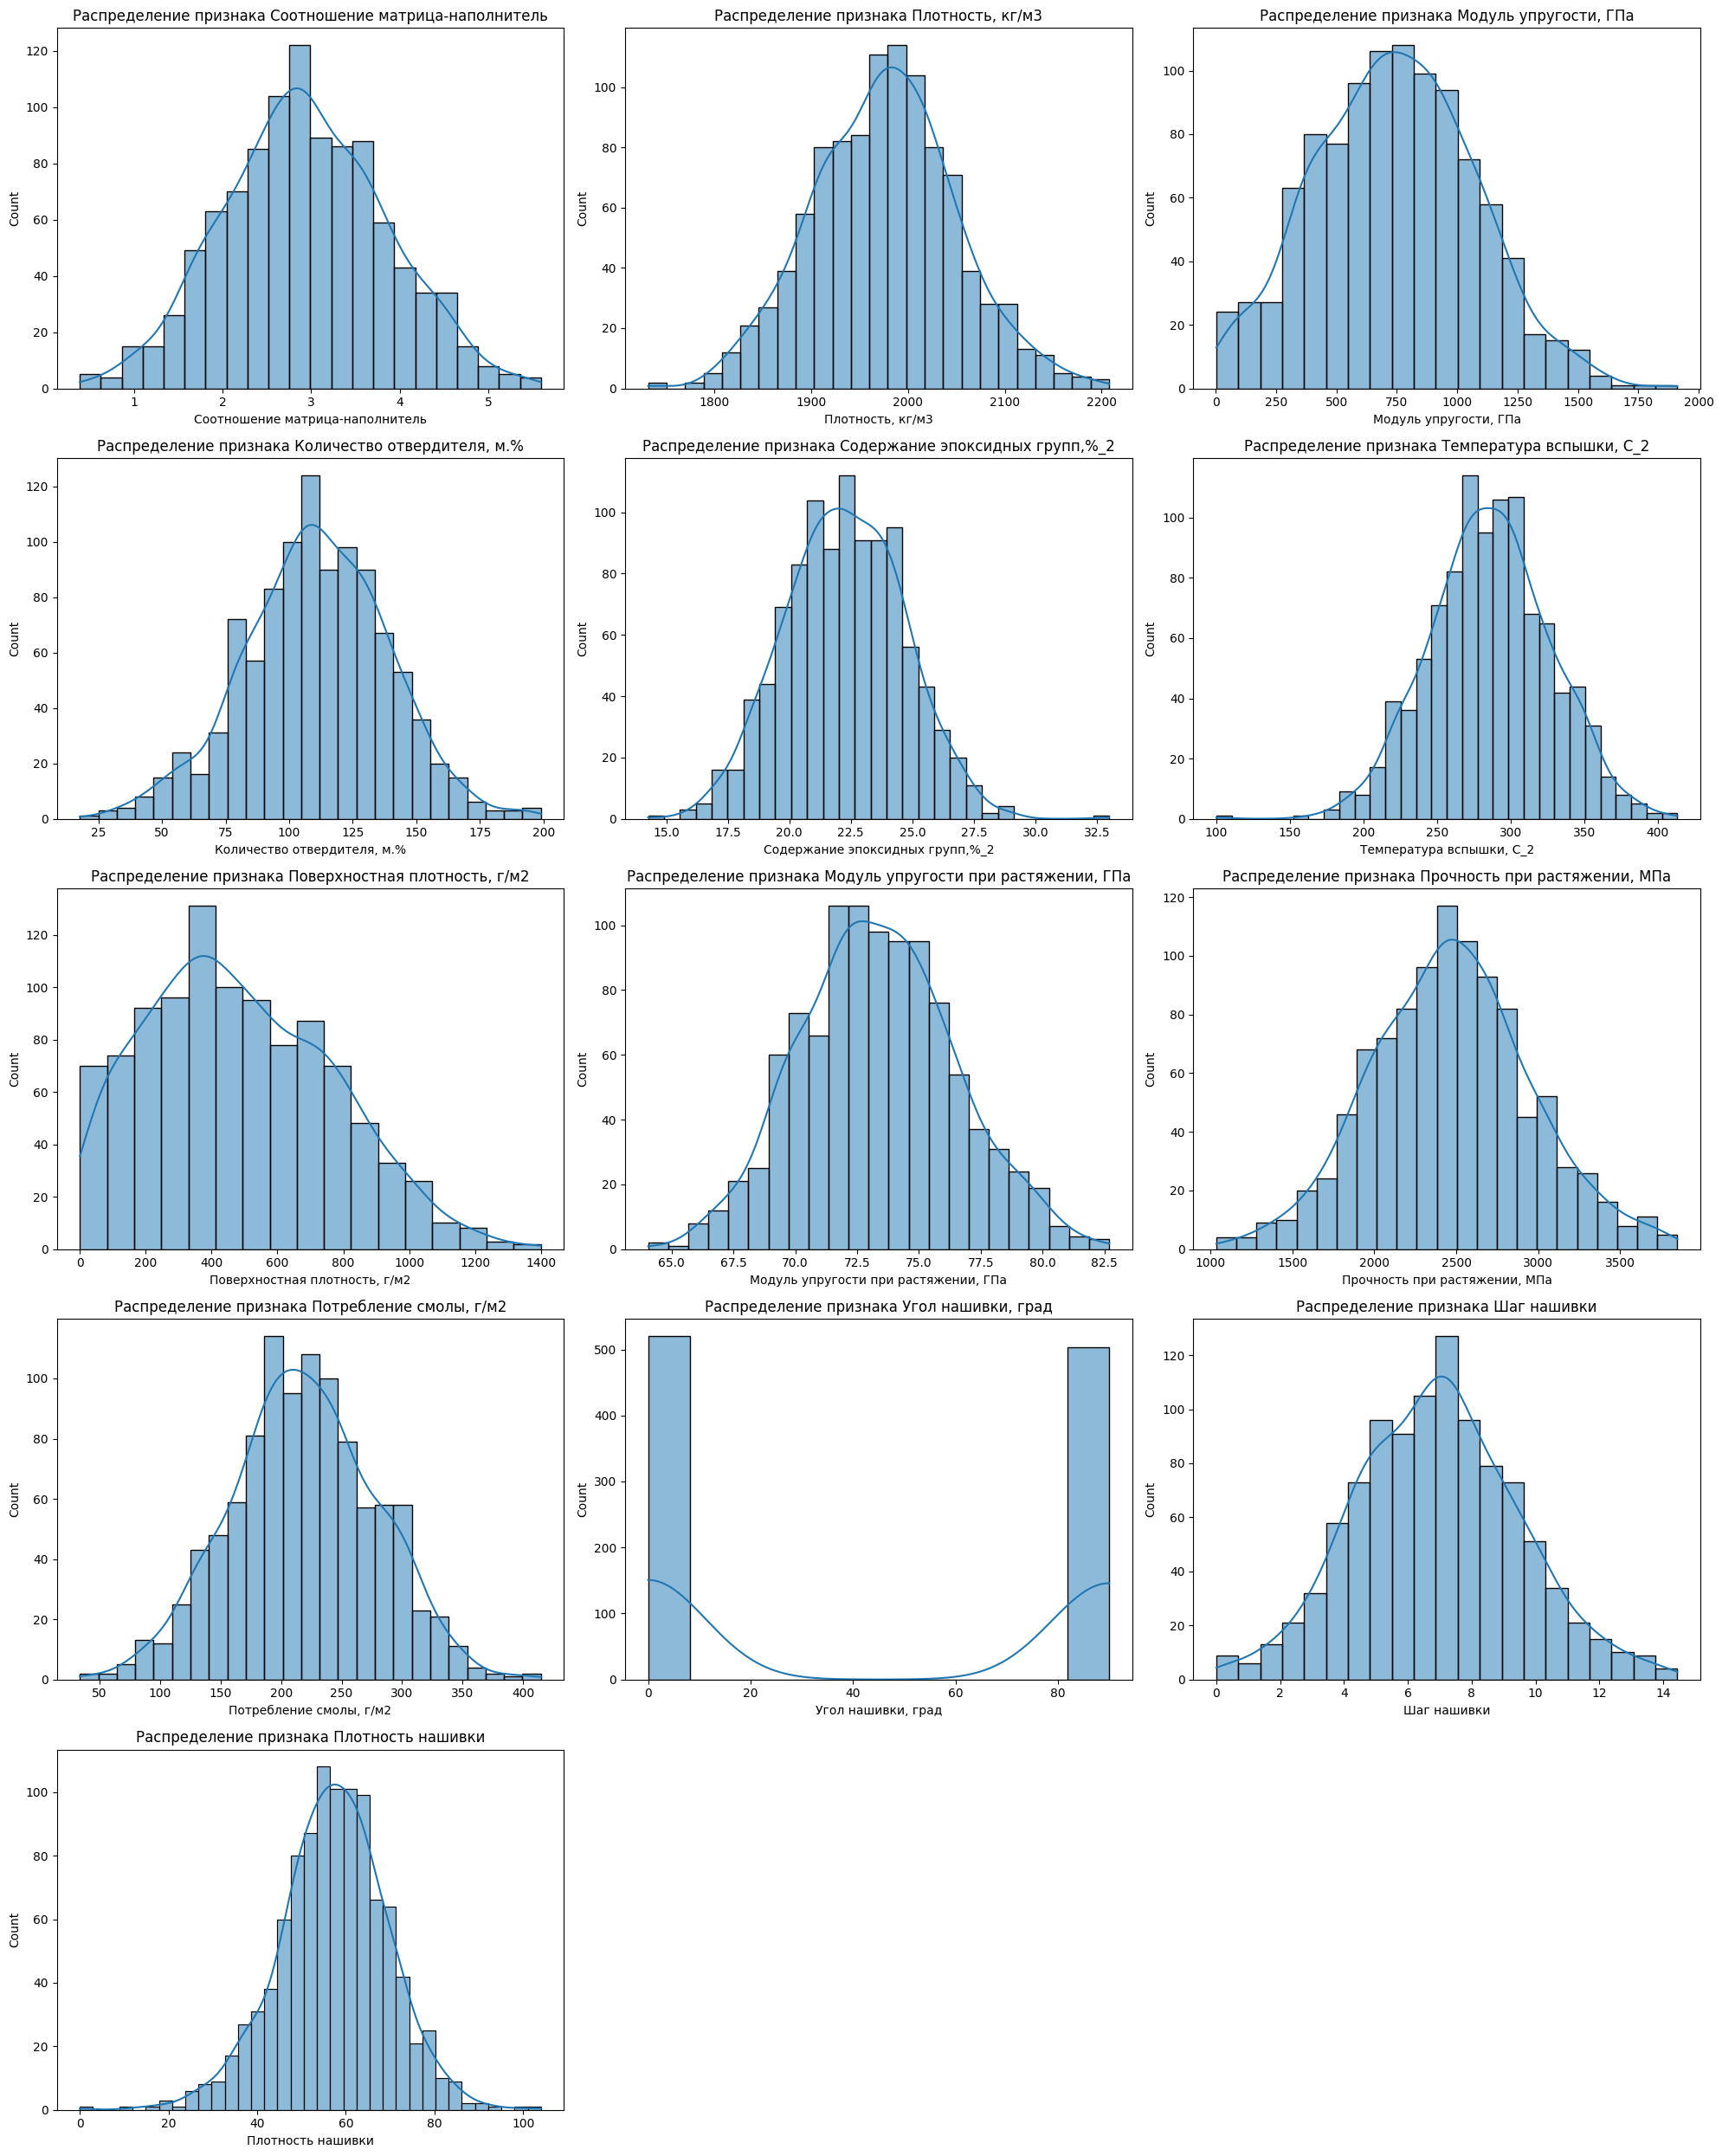

In [8]:
num_columns = 3
num_rows = (len(df.columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение признака {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Почти все признаки представлены почти идеальным нормальным распределением, за исключением вышеупомянутого признака "Угол нашивки", который имеет только два граничных значения - 0 и 90.
Так же по представленным гистограммам сложно сказать имеются ли выбросы у признаков, поэтому проверим выбросы через построение графиков boxplot.

In [9]:
def display_boxplots(df, num_columns=3):
    num_rows = (len(df.columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot признака {column}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

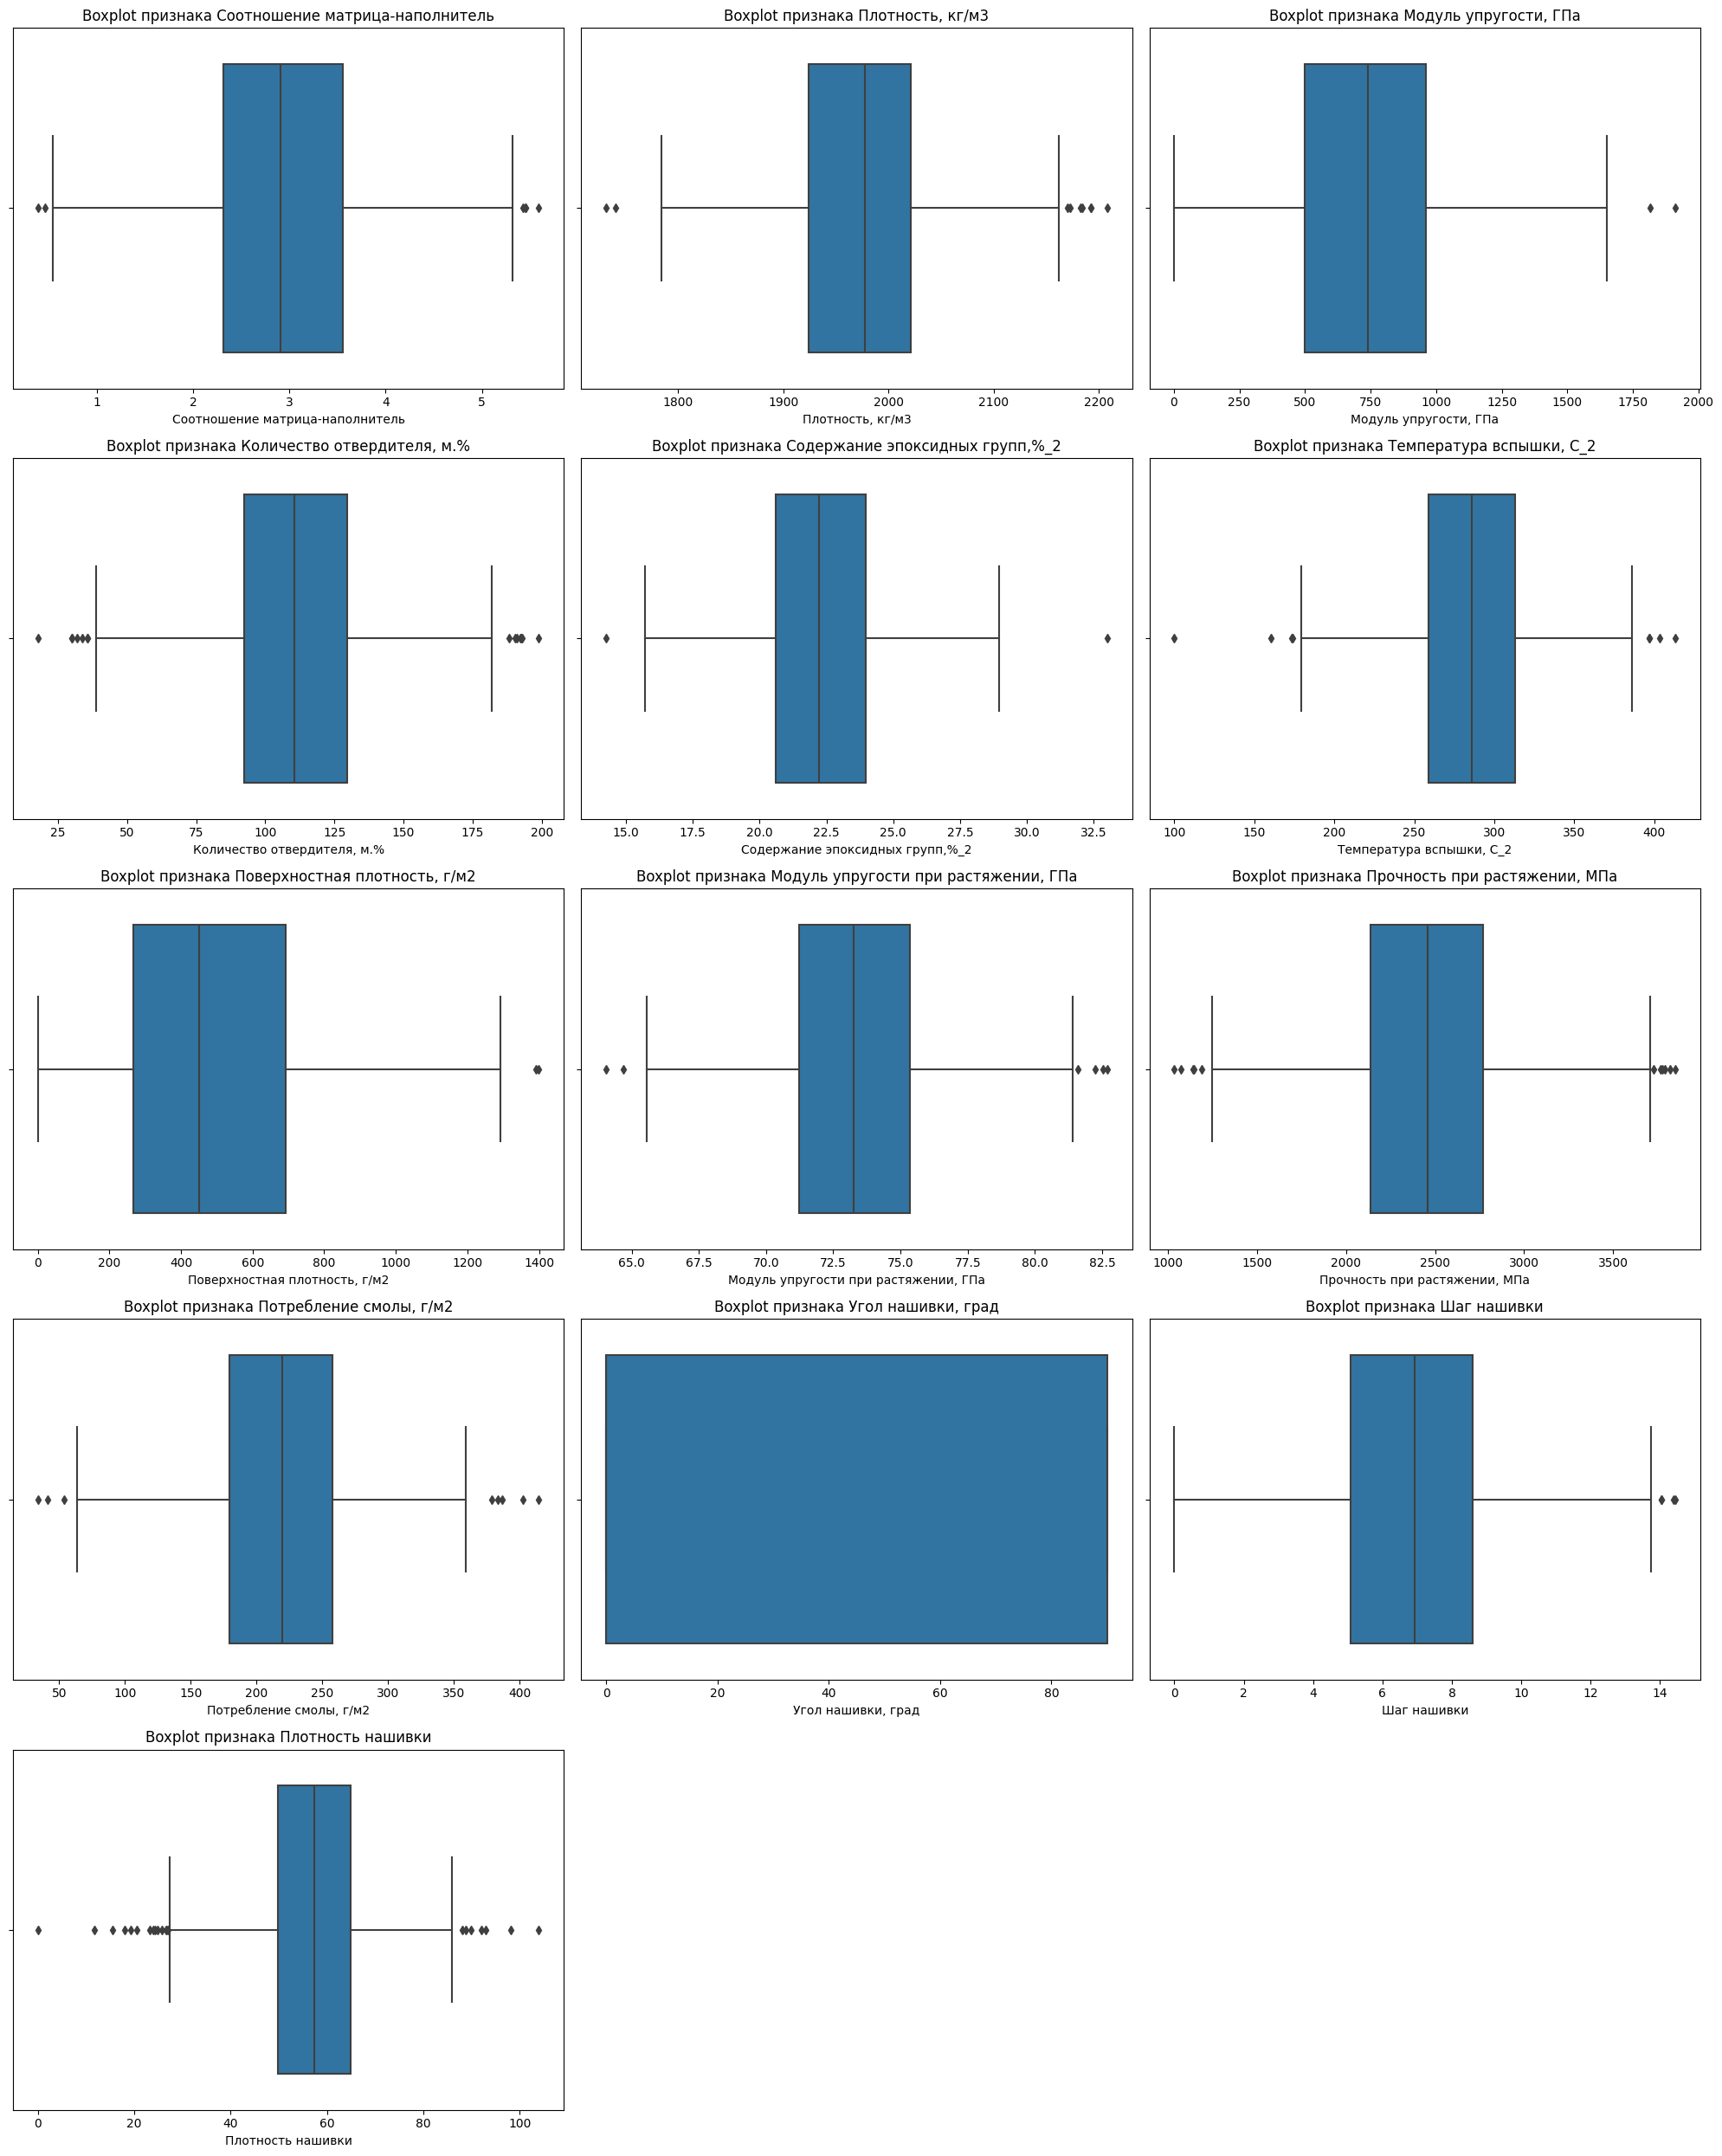

In [10]:
display_boxplots(df)

Так как в каждом признаке имеются выбросы, которые выходят за пределы статистических минимума и максимума и которые необходимо удалить.
Для этого используем функцию, которая будет удалять выбросы, опреденные с помощью интреквартильного размаха: 

In [11]:
def remove_outliers(df):
    df_clean = df.copy()
    for column in df_clean.columns:
        # вычисляем сам интерквартильный размах IQR
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        # определяем верхнюю и нижнюю границы
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # фильтруем DataFrame, удаляя выбросы
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

In [12]:
df_cleaned = remove_outliers(df)

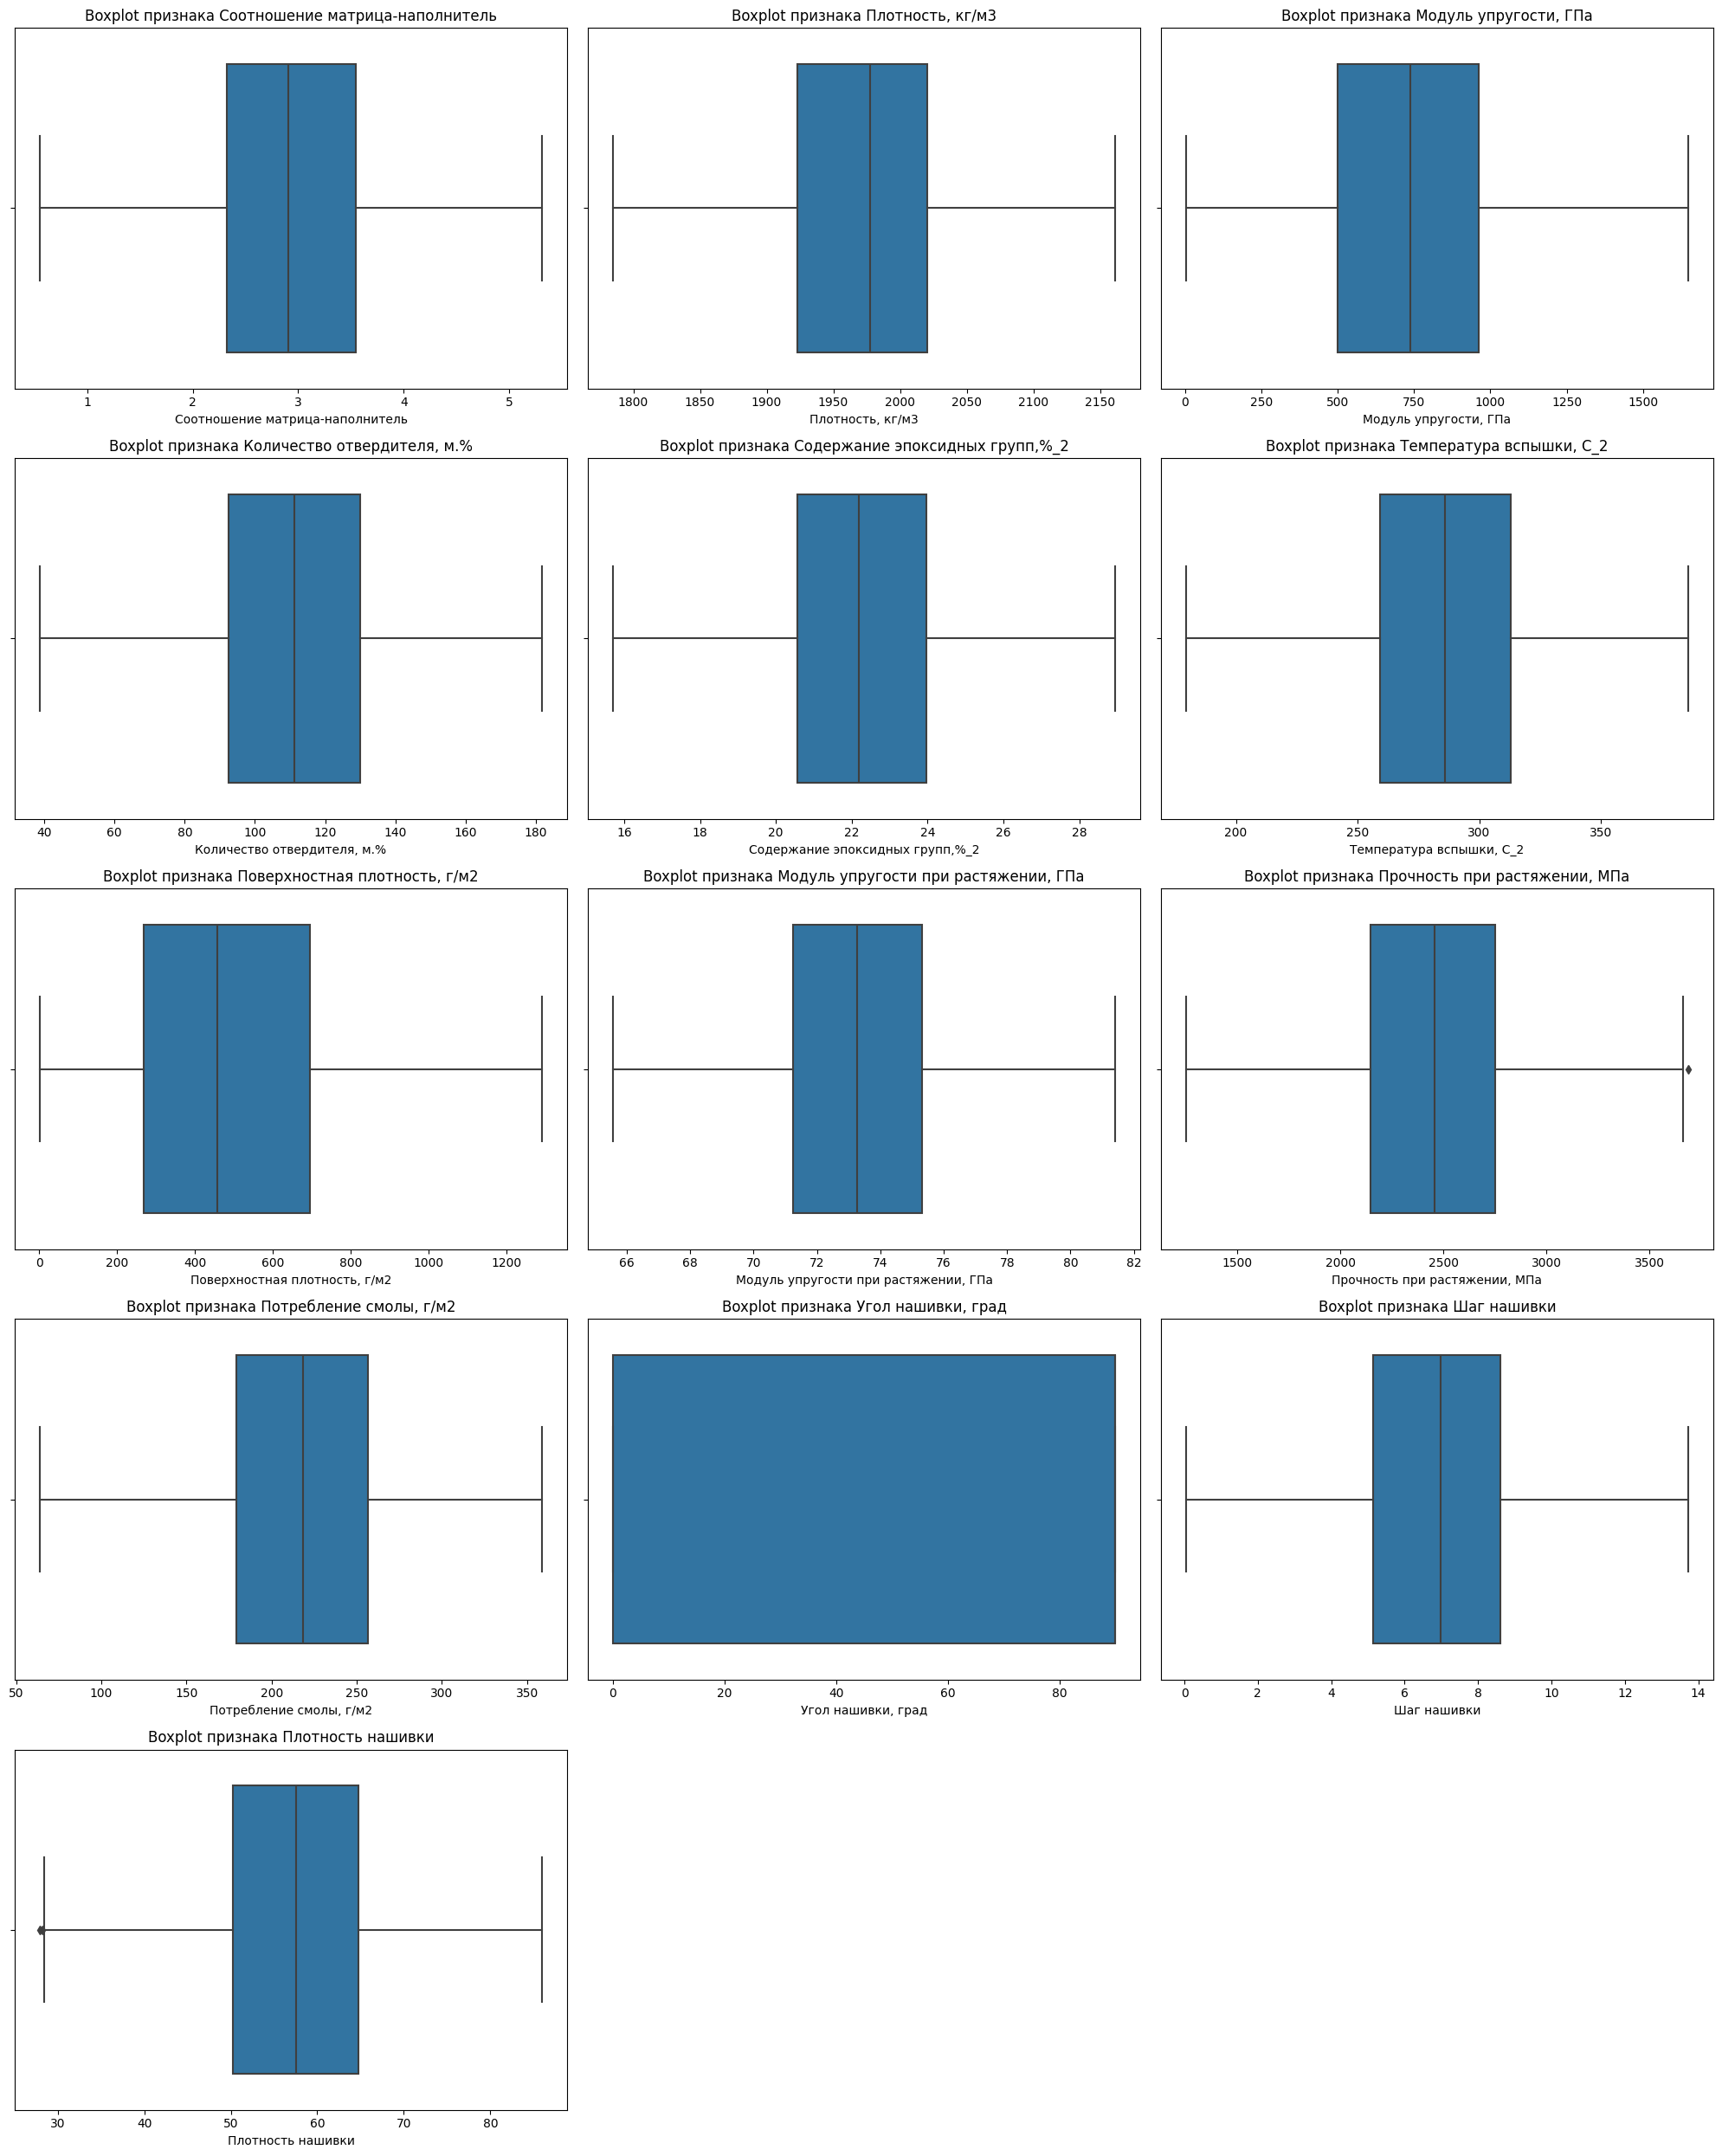

In [13]:
display_boxplots(df_cleaned)

In [14]:
print('Строк удалено в результате очистки данных от выбросов:', df.shape[0]-df_cleaned.shape[0])

Строк удалено в результате очистки данных от выбросов: 91


В результате очистки данных от выбросов была удалена 91 строка. 

Посомтрим на корреляцию данных в датасете на предмет отсутсвия колинеарности векторов:

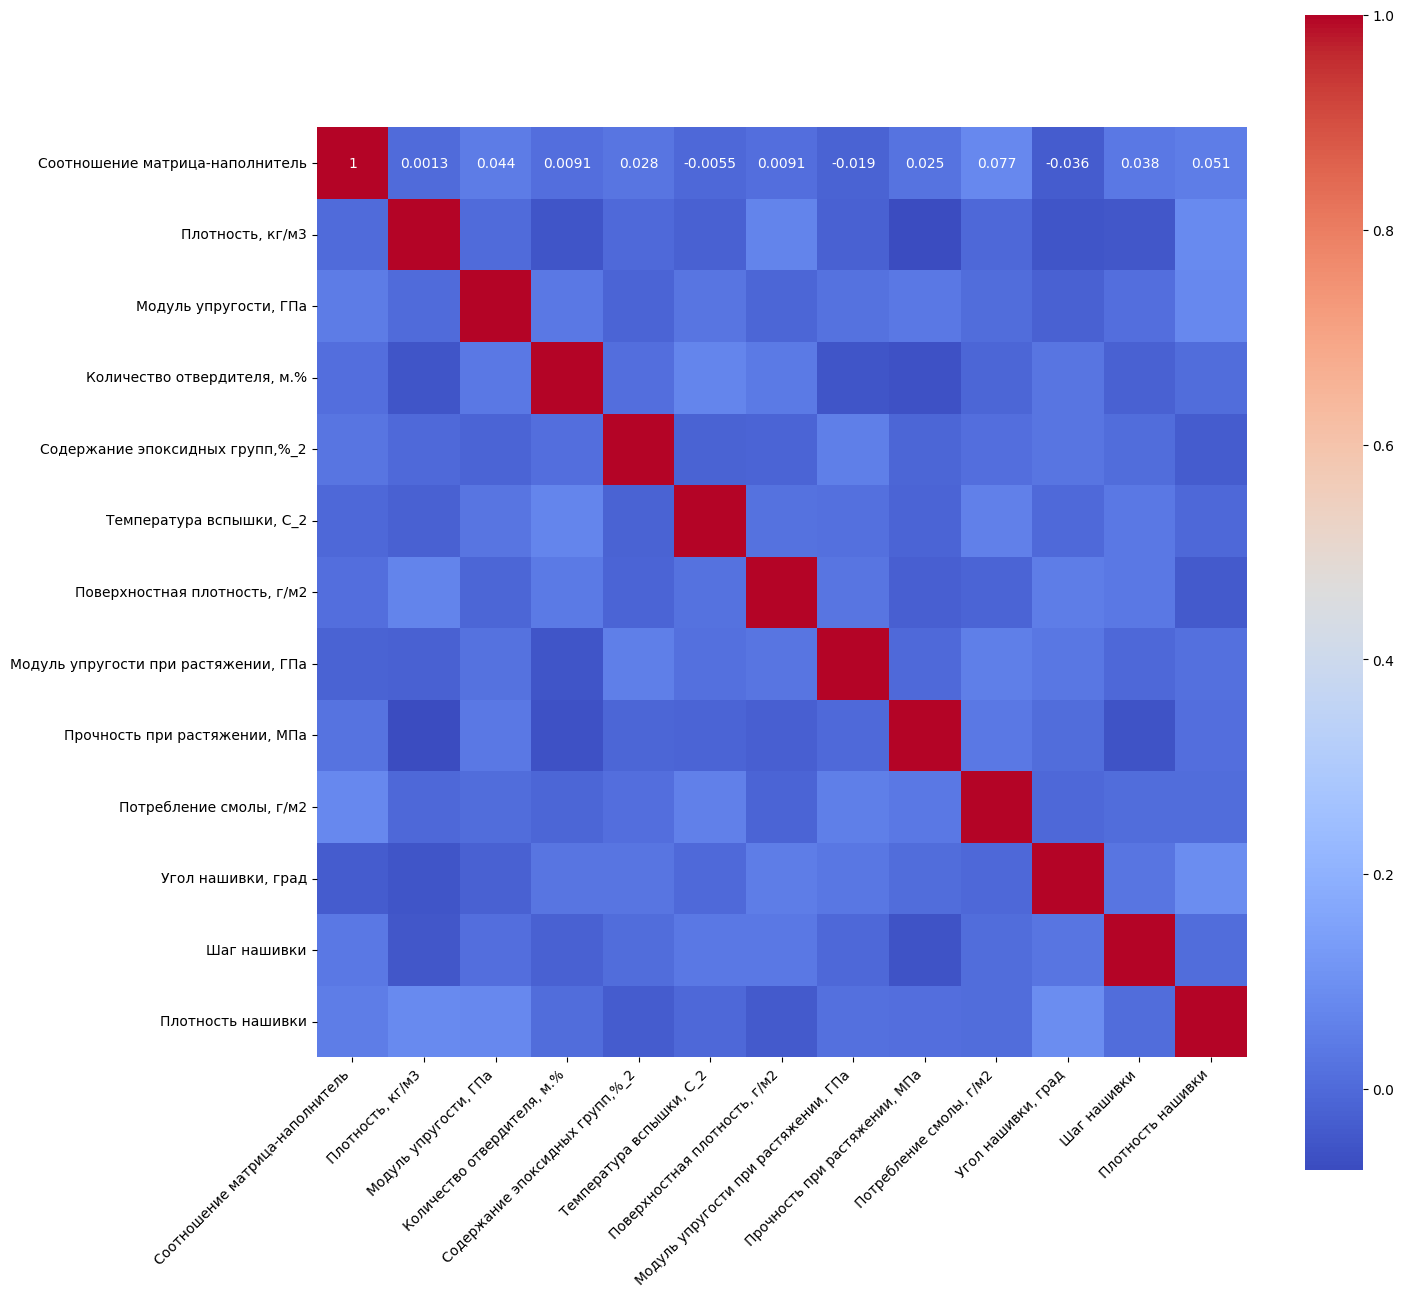

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=True, square=True)
plt.xticks(rotation=45, ha='right')
plt.show()

Признанаки не имеют высокой взаимокрреляции, поэтому никого из них исключать из итогового датасета не требуется. Сохраним итоговый очищенный дасет в отдельный файл для дальнейшей обработки (нормализации) и обучения моделей в ноутбуке model_research.ipynb:

In [16]:
df_cleaned.to_csv(r'datasets\cleaned_dataset.csv')